## pearson correlation coefficient

$r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}$

x_i  and y_i are the individual data points and x bar and y bar the dataset means

# spearman correlation coefficient

The Spearman rank correlation coefficient, $\rho$ , is a non-parametric measure of rank correlation. It assesses how well the relationship between two variables can be described using a **monotonic function**.

The formula for Spearman's rank correlation coefficient is:

$\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$

Where:
- $d_i$ is the difference between the ranks of corresponding variables.
- n is the number of observations.

The steps to compute the Spearman rank correlation coefficient are:

- Rank the values of the two variables separately. If there are tied values, assign the average of the ranks they would have received if they weren't tied.
- Calculate the difference between the ranks, $d_i$, for each observation.
- Square these differences, $d_i^2$.
- Sum up the squared differences.
- Plug into the formula to get \( \rho \).

The value of $\rho$ will always be between -1 and 1.


In [1]:
x1 = c(1:5)
y1 = c(1:5)

In [2]:
cor(x1,y1,method="pearson")

[1] 1

In [3]:
cor(x1,y1,method="spearman")

[1] 1

In [4]:
res_pearson = cor.test(x1, y1)
print( res_pearson$p.value )

res_spearman = cor.test(x1, y1, method="spearman" )
print( res_spearman$p.value )

[1] 3.971862e-24
[1] 0.01666667


In [5]:
x2 = c(1:5,10^10)
y2 = c(1:5,6)

In [6]:
cor(x2,y2,method="pearson")

[1] 0.6546537

In [7]:
cor(x2,y2,method="spearman")

[1] 1

In [8]:
res_pearson = cor.test(x2, y2)
print( res_pearson$p.value )

res_spearman = cor.test(x2, y2, method="spearman" )
print( res_spearman$p.value )

[1] 0.1583024
[1] 0.002777778


In [9]:
x3 = 0:10
y3 = x3^2

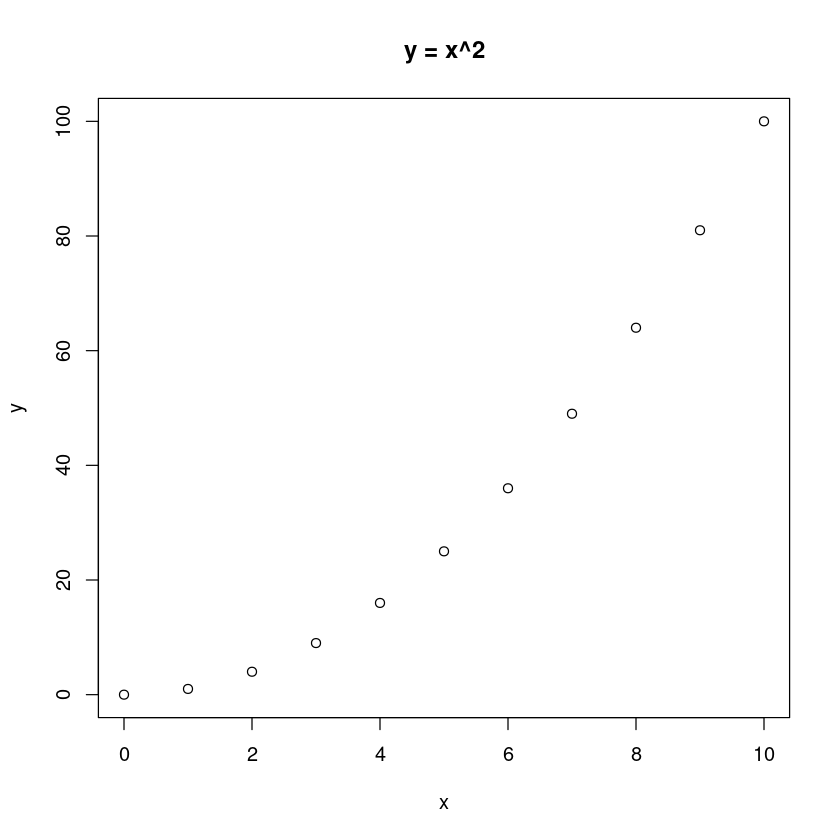

In [10]:
plot(x3, y3, main="y = x^2", xlab="x", ylab="y")

In [11]:
cor(x3,y3,method="pearson")

[1] 0.9631427

In [12]:
cor(x3,y3,method="spearman")

[1] 1

In [13]:
res_pearson = cor.test(x3, y3)
print( res_pearson$p.value )

res_spearman = cor.test(x3, y3, method="spearman" )
print( res_spearman$p.value )

[1] 1.966501e-06
[1] 0


In [14]:
x4 = 1:10
y4 = x4

x4 = c(x4,6)
y4 = c(y4,20)

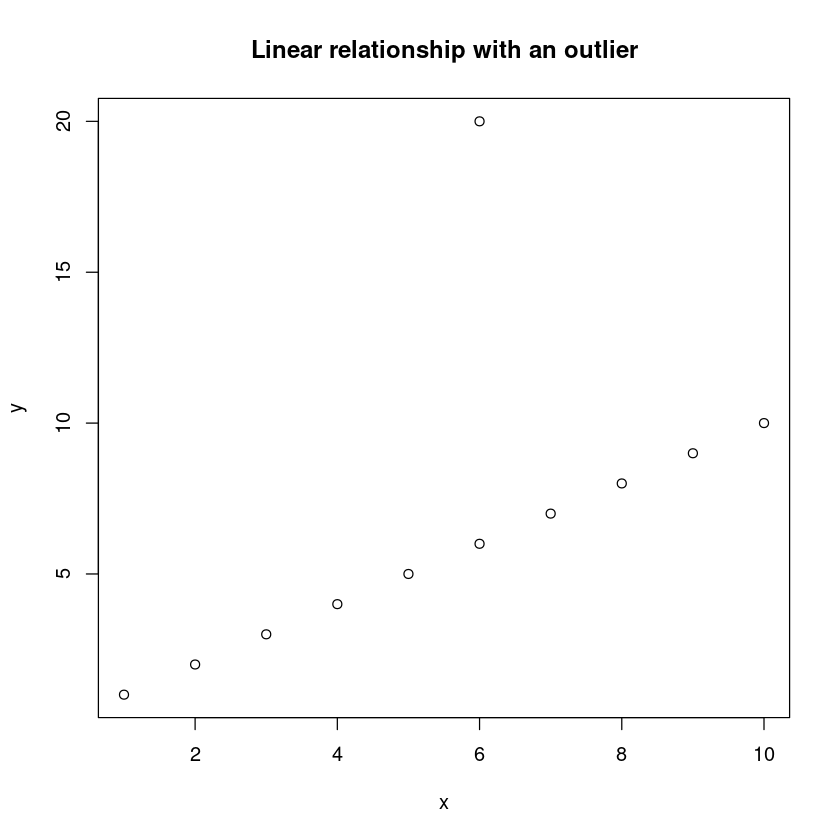

In [15]:

plot(x4, y4, main="Linear relationship with an outlier", xlab="x", ylab="y")

In [16]:
res_pearson = cor.test(x4, y4)
print( res_pearson$p.value )

res_spearman = cor.test(x4, y4, method="spearman" )
print( res_spearman$p.value )

[1] 0.05494234


Warning message in cor.test.default(x4, y4, method = "spearman"):
“Cannot compute exact p-value with ties”


[1] 0.0002577956


## the Kendall Tau
rank correlation coefficient that measures the ordinal association between two measured quantities

$\tau = \frac{{n_c - n_d}}{{n(n-1)/2}}$

- $n_c$ is the number of concordant pairs.
- $n_d$ is the number of discordant pairs.
- $n$ is the number of observations

In [17]:
res_kendall = cor.test(x4, y4, method="kendall" )
print( res_kendall$p.value )

Warning message in cor.test.default(x4, y4, method = "kendall"):
“Cannot compute exact p-value with ties”


[1] 0.0003281542


In [18]:
-(0.5*log(0.5) + 0.5*log(0.5))

[1] 0.6931472

In [19]:
-(0.25*log(0.25) + 0.25*log(0.25) + 0.25*log(0.25) + 0.25*log(0.25))

[1] 1.386294

# Mutual Information

Mutual Information (MI) between two random variables $X$ and $Y$ is defined as:

$MI(X, Y) = \sum_{y \in Y} \sum_{x \in X} p(x,y) \log\left(\frac{p(x,y)}{p(x)p(y)}\right)$

Where:

- $p(x,y)$ is the joint probability distribution function of $X$ and $Y$.
- $p(x)$ and $p(y)$ are the marginal probability distribution functions of $X$ and $Y$ respectively.

MI measures the amount of information that knowing the value of one of the variables provides about the other variable. A high MI value indicates a large amount of information shared between the two variables, while a MI value of 0 indicates that the variables are independent.

The MI is always non-negative, and symmetric:

$MI(X, Y) = MI(Y, X)$

MI is a generalization of entropy, which is a measure of uncertainty in a single random variable. The relationship between MI, entropy, and joint entropy is given by:

$MI(X, Y) = H(X) + H(Y) - H(X, Y)$
- $H(X)$ is the entropy of $X$.
- $H(Y)$ is the entropy of $Y$.
- $H(X, Y)$ is the joint entropy of $X$ and $Y$.



### test the famous circle case

In [1]:
#install.packages("infotheo")
library(infotheo)

In [2]:
n = 1000
theta = runif(n, 0, 2*pi)
r = 1
X = r * cos(theta)
Y = r * sin(theta)

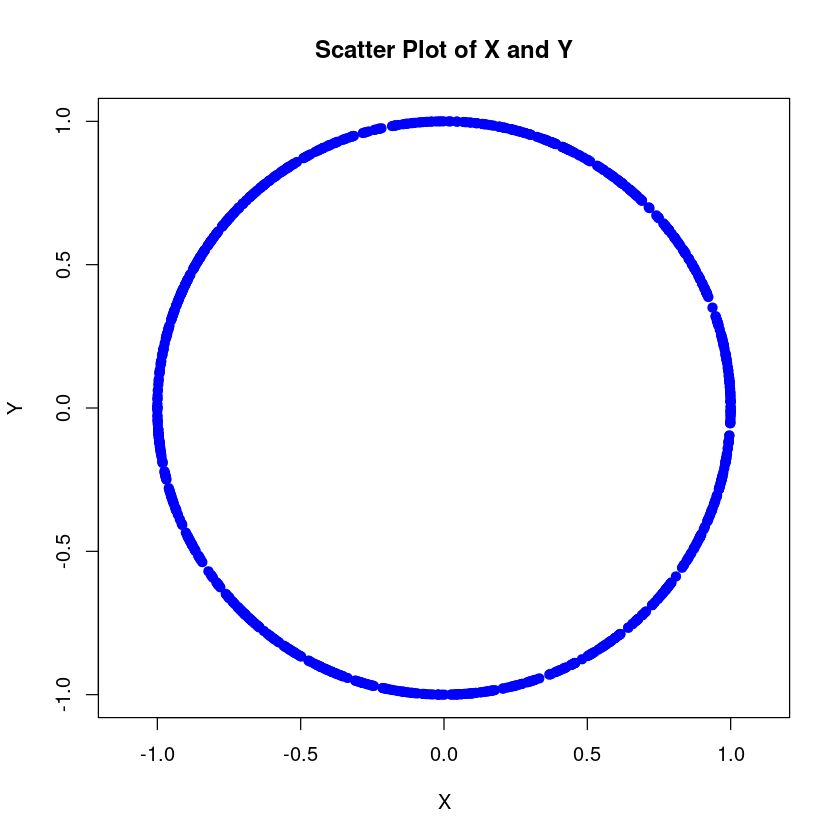

In [3]:
plot(X, Y, main="Scatter Plot of X and Y", xlab="X", ylab="Y", pch=19, col="blue", asp=1)

In [4]:
cor(X, Y, method="pearson" )

[1] -0.0178443

In [5]:
cor(X, Y, method="spearman" )

[1] -0.01279643

In [6]:
cor(X, Y, method="kendall" )

[1] 0.0006086086

In [7]:
X_discrete = as.integer(cut(X, breaks=10))
Y_discrete = as.integer(cut(Y, breaks=10))

mutinformation(X_discrete, Y_discrete)

[1] 1.056759

In [8]:
X_discrete

[1]  1 10 10  1  1  7  7  9  4 10  5  6  9  5  2  1 10  1 10  2  1 10  1  1
  [25]  1 10  9  8  1  9  1 10  1  6 10 10 10  8  5  8  4  1  3  2  1  1  3  1
  [49] 10  5 10  2  2 10  6  2  2  1  1 10  4  1  4  1  3  1  1  1  3  5 10  5
  [73] 10 10 10  2  3  5  1  1 10  9  9  7 10 10 10 10  9 10  4  2  7  4 10  1
  [97] 10  1  9  1  3  5 10  1  3 10  9  4  9  4  4 10 10  2  7  1  4  8  1  1
 [121]  3 10 10  1  9  1  4  3 10  9  5  9  1 10  2  9 10  2  9  5 10  5  1 10
 [145] 10  1  6  3  1  7  1  6  8 10  1  1 10  2  7  2  8 10 10 10  6  5  6 10
 [169] 10  5  4  3  5  7 10  3  1  6  3 10  4  4  1  4  7  9 10  9 10  1  8 10
 [193]  6  2 10  1  9  7 10  3  6  5 10  1  2  9  2  1  3  5  2  1  2  1  7  5
 [217]  9  9  7  9  4  2  9  1  1  2  3  2 10  5 10  8  3  4  1  4  8  4  1  1
 [241]  5  7  4 10  6  1  2  6  1  7  1  1  3 10  1  7  8  7  8  1  9  8 10  2
 [265]  1 10  3  1  8  4  1  5 10  7  7  2 10 10  6  2 10  2 10  6 10  5  6  9
 [289]  1  1 10  4 10  8  5  6  4  2  7  1 10  8  9 10  3  2  4  5  7  1  3  2
 [313]  1  1  1 10  2  4  9  1  6 10  1 10 10  1  1  1  3  7  6  6  1  8  2  1
 [337]  3  3  1  9 10  2 10 10  1  8  1  2  9  3  7 10  6  7  1 10  2  1  5  6
 [361]  1  9  1  1  2  1  3  2 10  2  8  1  1  7  2  4  9  1  8 10  1  1 10  1
 [385]  1  1 10  5 10  1  9  9  9  1  1  7 10  6  5  1  1  7  6  2  7  2  8  1
 [409]  7  2  3  9  1  3  5  1  5 10  5  7 10  4  1  1 10  1  3  1  1  6  1 10
 [433]  3 10  9 10 10  2  6  2  9  1  9  1  2  8  2  2  2  4 10 10  3  1  9  9
 [457]  1  9 10 10  8  9  5  9 10  1  5  7  1  2  1  1 10 10  8 10  1  1  3  1
 [481]  3  2 10 10  5  2  9  2  9  1  7  3  6  2  9 10  1  6  9  9  1  1  4  1
 [505]  1  3  4  9  7  2  8  3  9  1  4 10 10  9  3 10 10  3  5  1  7 10  6  5
 [529]  2  6  2  3  1  3  8 10 10  8 10  1  8  5  6  3  1 10  4 10  2  9  8 10
 [553]  7  3  1  2  4  7  8  9  2  4  7  1  1 10  5 10  5  1  1 10 10  1 10  1
 [577]  1  1  4 10  6  9  1 10  3  8  5  1  1 10  1  3  7  6  1  6  3  8  7  6
 [601]  1  5  3  7  3  2  7 10  7  1  2  1 10  1  1  4  8 10  1  8  9 10  6  1
 [625]  2 10  2 10  8  9  8  4 10 10  3 10  1  4  8  7  3  2  1  6  2  9  7  2
 [649]  5  4 10  2  2  4  2  1  7  4  1  8  6  8  3  5  6  1 10  1 10  6  7  7
 [673]  8  2  1 10  3  4  1 10  1 10  1  9  2  2  6  1  8  2  7 10  8  3  2  9
 [697]  6  7  4  8  1  6  1  1  9 10  7  3  1  8  3 10  1 10 10  1  9  6  7  3
 [721]  3  9 10  1  1  8  6  1  6  2  1  1  2  4  6  2 10  1  4  2  9  7  5  1
 [745]  2  1  6  3  9  1  6  8  1 10  8  2  3  8  8  8  7  1  1  8  6 10  1  2
 [769]  3  2  7  1  6  1 10  5  7  9  1  2  6  5  9  8  1  6 10  9  6  7 10  7
 [793]  1  3  1  3  1 10  4  7  5  1  2  6  7 10  8  2  6  8  2  3  9  3  9  4
 [817]  3 10 10  8  4  1  8  9  5  8  2 10  8  9  9  2  1  4  4  9  2  6  1  7
 [841]  1  1  7  1 10 10  3  1  1  5  7  8  7  7  9 10  9  4  8  1  2  3  1  1
 [865]  1 10 10  1 10  2  9  1 10  9  2  3  2  5  9 10  2  6  7  7  1  1  5  8
 [889]  5  8  3  6  4  9  3  2  2 10  1  1 10 10 10 10  3  7 10  7 10  9  8  2
 [913]  8  5 10  9 10  3  4  1 10 10  4  6  5  3  1 10  3  1  8  5 10  5 10 10
 [937]  9 10  1  6  5  3  2  1 10  1  9  3  9 10  6 10  6  3  9 10  5  1  1  7
 [961]  1  8  6  7  6  1  8  4  1  1 10 10 10  1  8 10  2 10  9  1 10 10  2 10
 [985] 10  7  4  3 10  4  2  8  2 10  2  8  4  2  4  1

### V shaped data

In [9]:
x_left = seq(-5, 0, length.out=10)
y_left = seq(5, 0, length.out=10)

x_right = seq(0, 5, length.out=10)
y_right = seq(0, 5, length.out=10)

X = c(x_left, x_right)
Y = c(y_left, y_right)

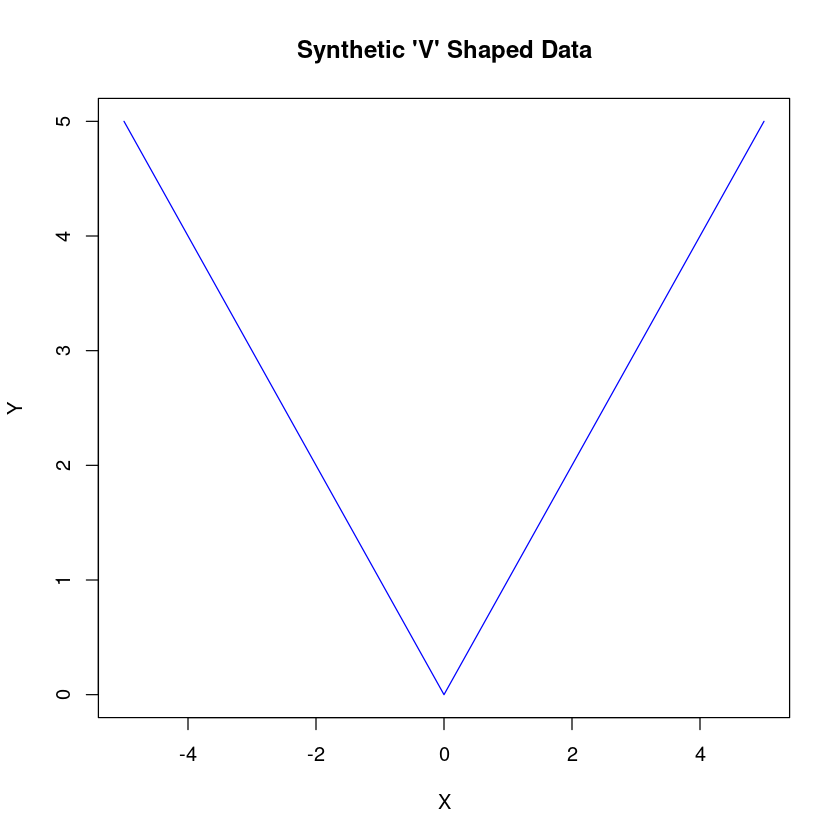

In [10]:
plot(X, Y, main="Synthetic 'V' Shaped Data", xlab="X", ylab="Y", pch=19, col="blue", type="l")

In [11]:
cor(X, Y, method="pearson" )

[1] 4.167603e-17

In [12]:
cor(X, Y, method="spearman" )

[1] 0.03240396

In [13]:
cor(X, Y, method="kendall" )

[1] 0.0267395

In [14]:
X_discrete = as.integer(cut(X, breaks=10))
Y_discrete = as.integer(cut(Y, breaks=10))
mutinformation(X_discrete, Y_discrete)

[1] 1.65259

In [15]:
n = 10000
X = rep(seq(1,10,by=1),100000)
Y = runif( length(X) )*10

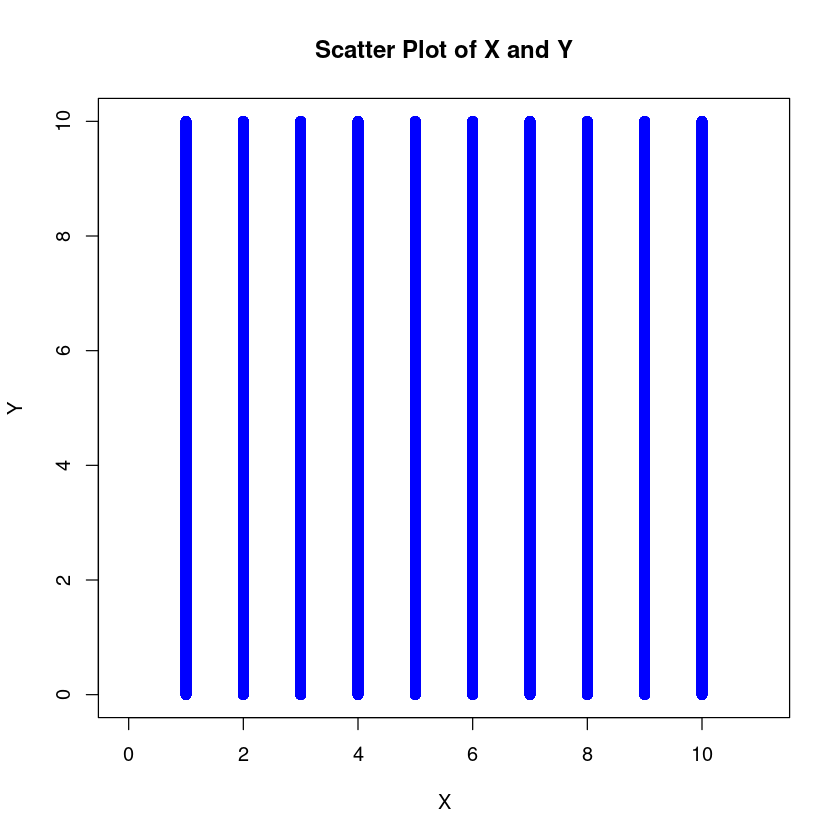

In [16]:
plot(X, Y, main="Scatter Plot of X and Y", xlab="X", ylab="Y", pch=19, col="blue", asp=1)

In [30]:
cor(X,Y)

[1] 0.00576628

In [17]:
X_discrete = as.integer(cut(X, breaks=10))
Y_discrete = as.integer(cut(Y, breaks=10))
mutinformation(X_discrete, Y_discrete)

[1] 3.800666e-05

In [20]:
n = 1000
X = rnorm(10000)
Y = rnorm(10000)

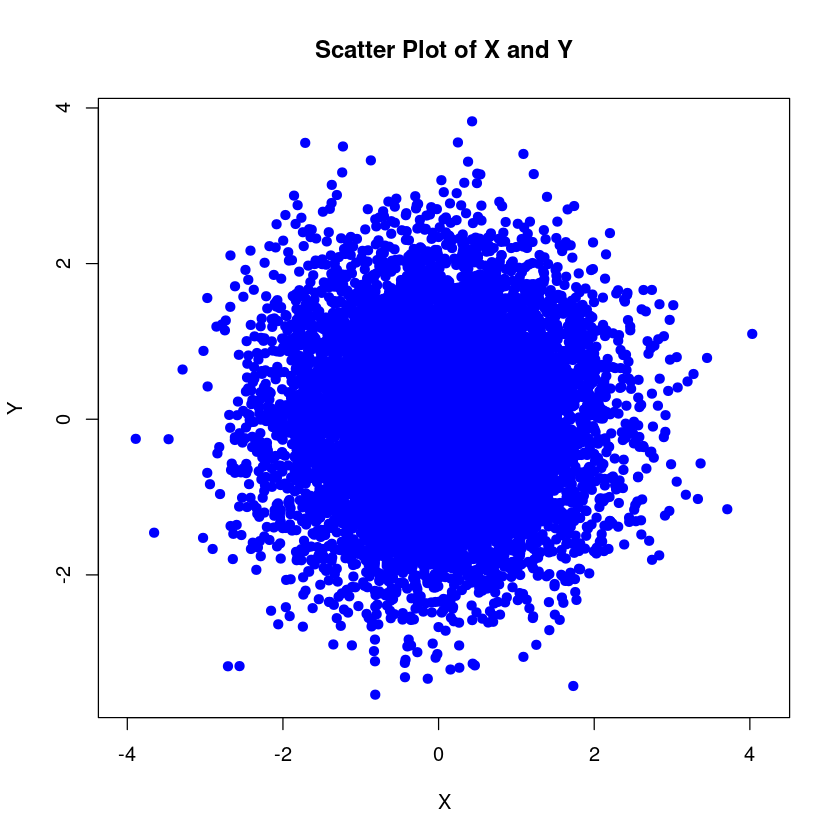

In [21]:
plot(X, Y, main="Scatter Plot of X and Y", xlab="X", ylab="Y", pch=19, col="blue", asp=1)

In [22]:
cor(X,Y, method="pearson")

[1] 0.01103709

In [23]:
X_discrete = as.integer(cut(X, breaks=10))
Y_discrete = as.integer(cut(Y, breaks=10))
mutinformation(X_discrete, Y_discrete)

[1] 0.004099232

In [26]:
n = 1000
X = c(rnorm(1000,mean = 0,sd =1),rnorm(1000,mean = 10,sd =1), rnorm(1000,mean = 0,sd =1), rnorm(1000,mean = 10,sd =1))
Y = c(rnorm(1000,mean = 0,sd =1),rnorm(1000,mean = 0,sd =1), rnorm(1000,mean = 10,sd =1), rnorm(1000,mean = 10,sd =1))


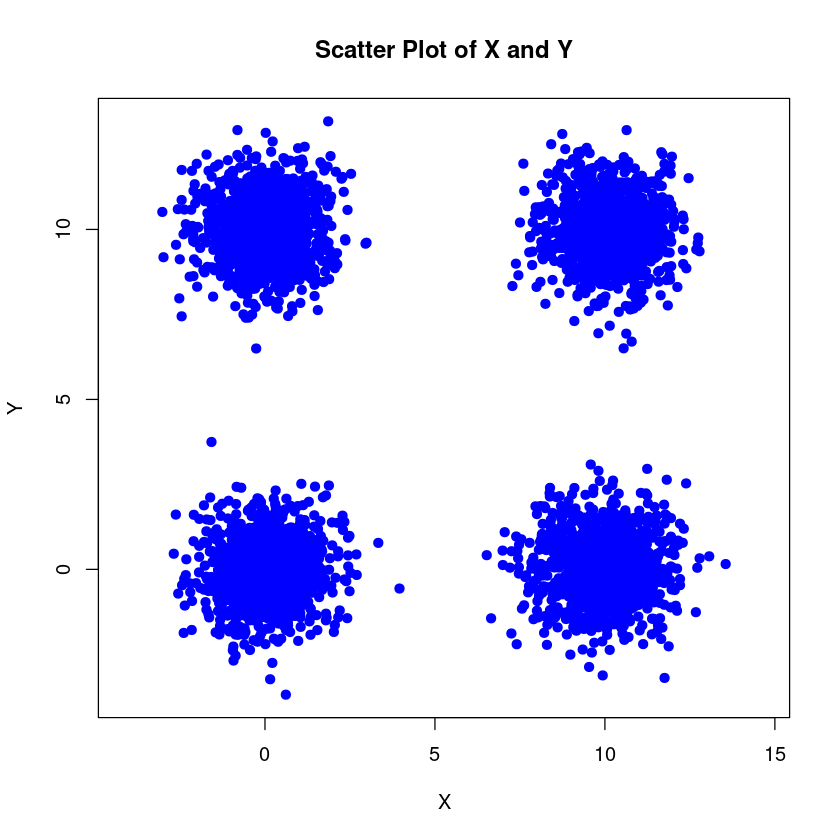

In [27]:
plot(X, Y, main="Scatter Plot of X and Y", xlab="X", ylab="Y", pch=19, col="blue", asp=1)

In [28]:
cor(X,Y, method="pearson")

[1] 0.00576628

In [29]:
X_discrete = as.integer(cut(X, breaks=10))
Y_discrete = as.integer(cut(Y, breaks=10))
mutinformation(X_discrete, Y_discrete)

[1] 0.009295552

In [31]:
n = 1000
X = c(rnorm(1000,mean = 0,sd =1),rnorm(1000,mean = 10,sd =1) )
Y = c(rnorm(1000,mean = 0,sd =1),rnorm(1000,mean = 10,sd =1) )


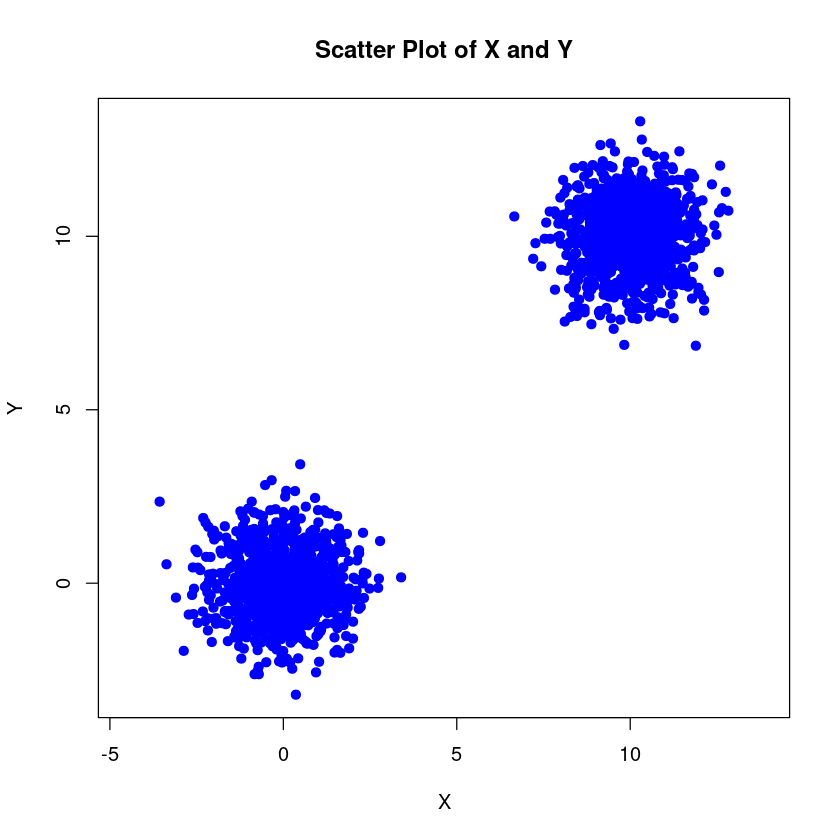

In [32]:
plot(X, Y, main="Scatter Plot of X and Y", xlab="X", ylab="Y", pch=19, col="blue", asp=1)

In [33]:
X_discrete = as.integer(cut(X, breaks=10))
Y_discrete = as.integer(cut(Y, breaks=10))
mutinformation(X_discrete, Y_discrete)

[1] 0.6989239

In [34]:
cor.test(X,Y)


	Pearson's product-moment correlation

data:  X and Y
t = 158.8, df = 1998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9592315 0.9656790
sample estimates:
      cor 
0.9625913 
